# Dane Przestrzenne w Pythonie - wektory

| Metadane              | Wartość                                                                                                            |
|-----------------------|--------------------------------------------------------------------------------------------------------------------|
| Kurs - adres YT       | [Dane Przestrzenne w Pythonie - wektory](https://www.youtube.com/playlist?list=PLDiotiqXJ72UjlnpDEVsTx-C1ICsGdMyP) |
| Część kursu           | 4.1 - Wprowadzenie do GeoPandas                                                                                    |
| Ostatnia aktualizacja | 2025-01-24                                                                                                          |
| Autor                 | Szymon Moliński                                                                                                    |



## Metody i atrybuty przestrzenne

W ramach zajęc zajmiemy się analizą atrybutów i metod, które ściśle nawiązują do danych przestrzennych. Jeśli przychodzisz z podwórka Data Science prawdopodobnie pierwszy raz zetkniesz się z niektórymi cechami obiektów GIS. Nie przejmuj się, jeśli tego teraz nie do końca rozumiesz, zrozumienie na pewno przyjdzie z czasem!

In [2]:
import geopandas as gpd
import numpy as np

In [6]:
FNAME = 'nysd_20d/nysd.shp'
FPATH = 'data/nysd_20d.zip'
ZIP_PATH = 'zip://' + FPATH + '!' + FNAME

FS = (10, 10)

In [4]:
gdf = gpd.read_file(ZIP_PATH)

In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SchoolDist  33 non-null     int64   
 1   Shape_Leng  33 non-null     float64 
 2   Shape_Area  33 non-null     float64 
 3   geometry    33 non-null     geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 1.2 KB


<Axes: >

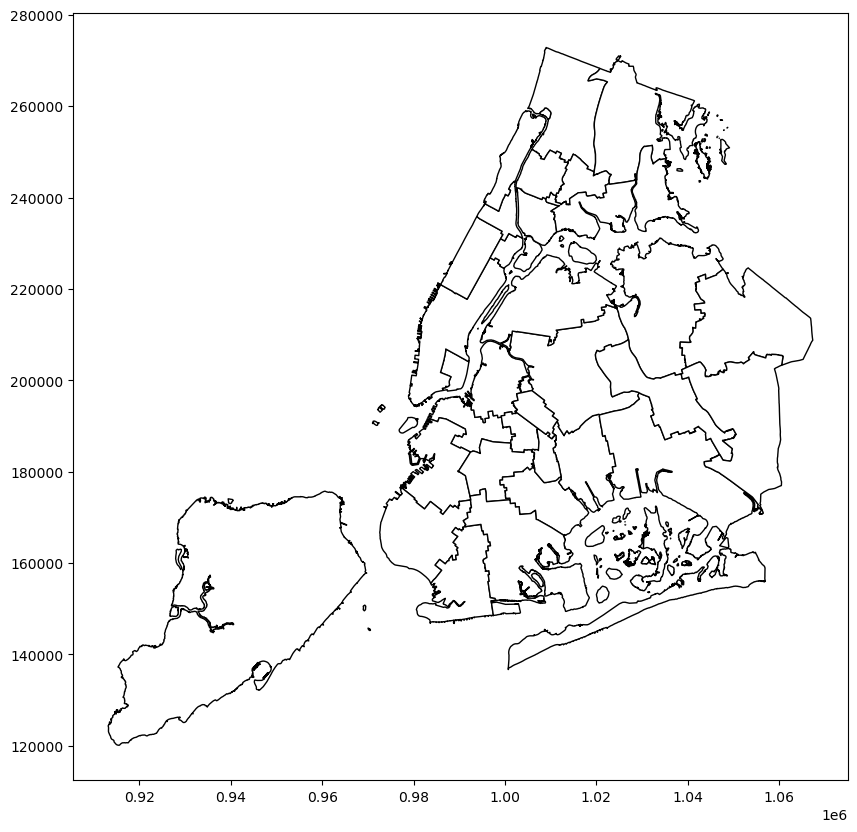

In [13]:
gdf.plot(figsize=FS, edgecolor='black', color='white')

In [14]:
gdf['geometry_var'] = gdf['Shape_Area'] / gdf['Shape_Leng']

<Axes: >

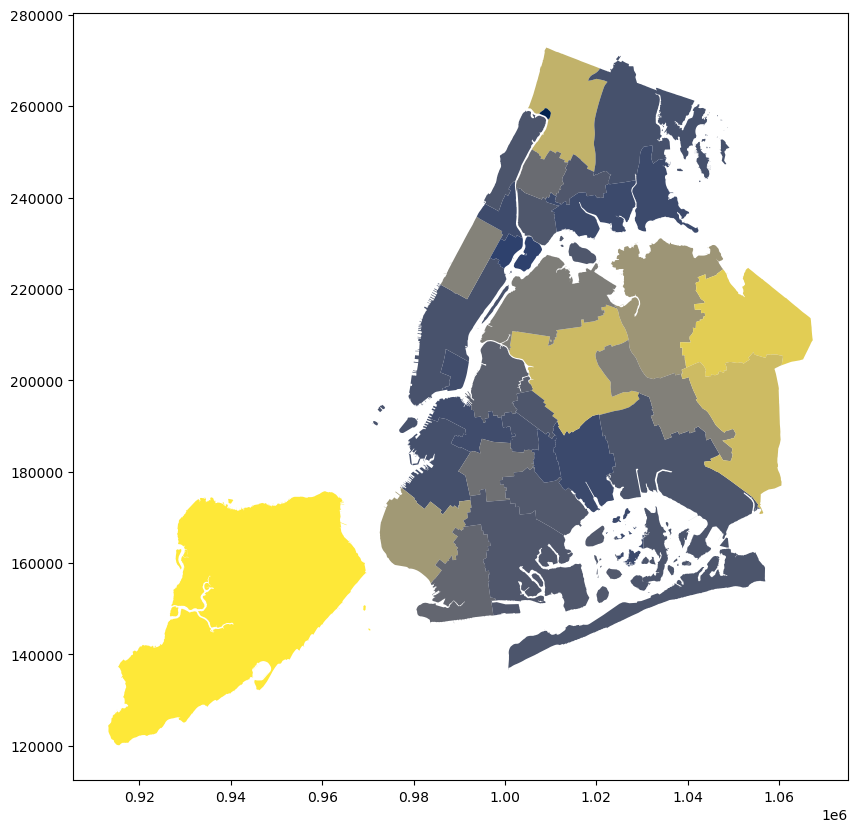

In [15]:
gdf.plot(figsize=FS, column='geometry_var', cmap='cividis')  # colorblind scheme

<Axes: >

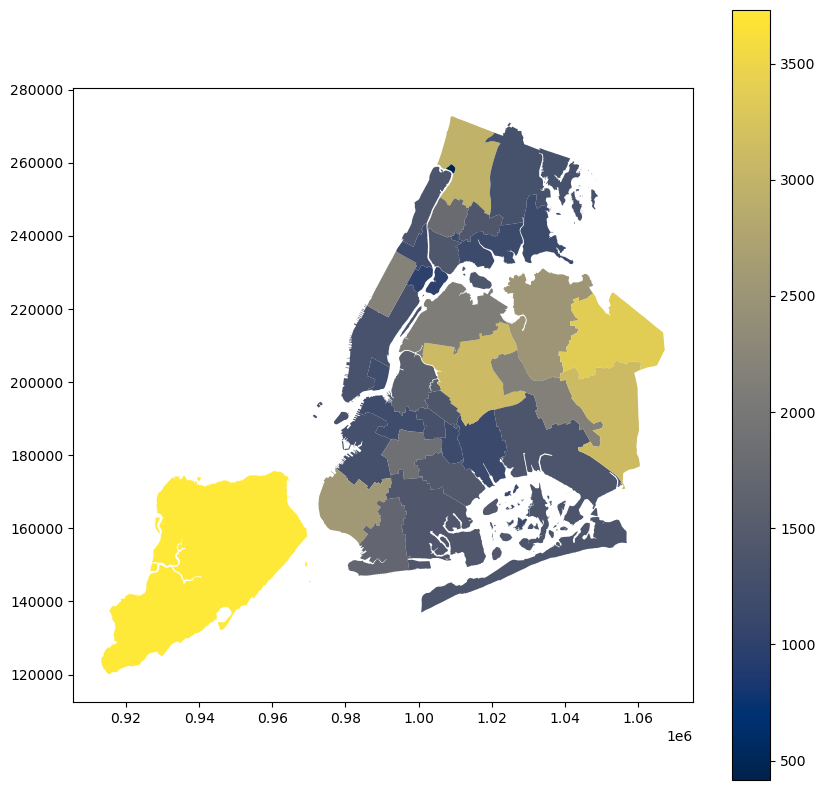

In [16]:
gdf.plot(figsize=FS, column='geometry_var', cmap='cividis', legend=True)

## Atrybuty GeoDataFrame

### `area`

In [17]:
gdf.head()

,SchoolDist,Shape_Leng,Shape_Area,geometry,geometry_var
0,1,28641.223059,3.516033e+07,"POLYGON ((992073.467 203714.076, 992068.667 20...",1227.612659
1,10,94956.718074,2.825410e+08,"POLYGON ((1020767.838 268271.133, 1020752.058 ...",2975.471301
2,11,305035.869503,3.932277e+08,"MULTIPOLYGON (((1042822.450 243439.814, 104255...",1289.119528
3,12,48578.087537,6.909795e+07,"POLYGON ((1016662.949 248181.796, 1016897.339 ...",1422.409760
4,13,86634.820950,1.048708e+08,"POLYGON ((990055.507 196472.349, 990004.946 19...",1210.492258


In [18]:
gdf['area_gpd'] = gdf.area

In [19]:
gdf.head()

,SchoolDist,Shape_Leng,Shape_Area,geometry,geometry_var,area_gpd
0,1,28641.223059,3.516033e+07,"POLYGON ((992073.467 203714.076, 992068.667 20...",1227.612659,3.516033e+07
1,10,94956.718074,2.825410e+08,"POLYGON ((1020767.838 268271.133, 1020752.058 ...",2975.471301,2.825410e+08
2,11,305035.869503,3.932277e+08,"MULTIPOLYGON (((1042822.450 243439.814, 104255...",1289.119528,3.932277e+08
3,12,48578.087537,6.909795e+07,"POLYGON ((1016662.949 248181.796, 1016897.339 ...",1422.409760,6.909795e+07
4,13,86634.820950,1.048708e+08,"POLYGON ((990055.507 196472.349, 990004.946 19...",1210.492258,1.048708e+08


In [21]:
(gdf['Shape_Area'] == gdf['area_gpd']).any()

False

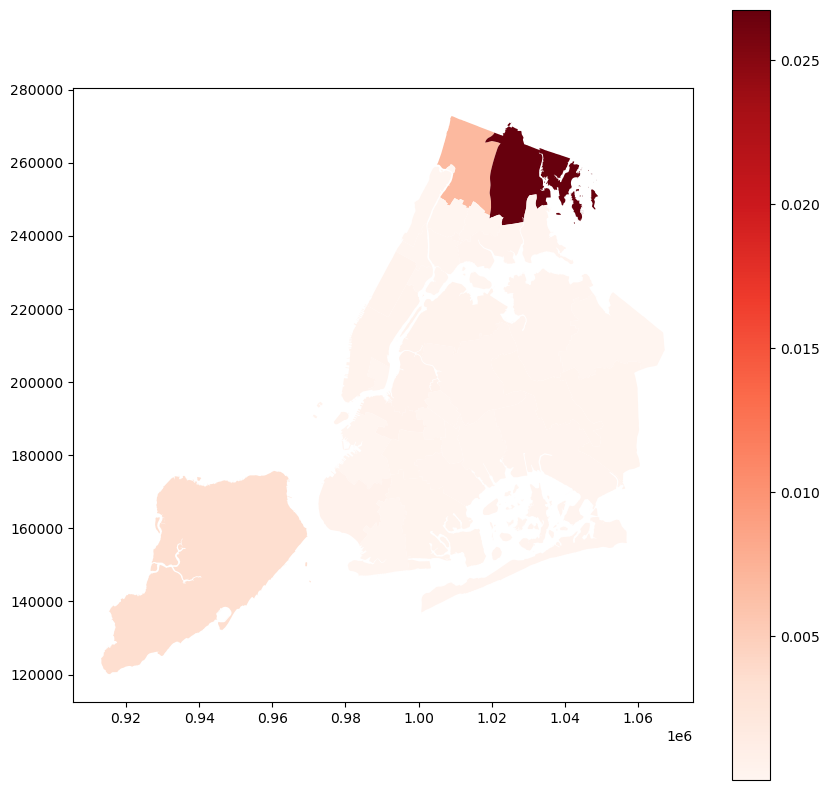

In [22]:
gdf['area_error'] = np.sqrt((gdf['Shape_Area'] - gdf['area_gpd'])**2)
gdf.plot(figsize=FS, column='area_error', cmap='Reds', legend=True);

In [23]:
smape_n = np.abs(gdf['area_gpd'] - gdf['Shape_Area'])
smape_d = (np.abs(gdf['area_gpd']) + np.abs(gdf['Shape_Area'])) / 2

smape = np.mean(100 * smape_n / smape_d)
print(f'Symmetrical Mean Absolute Percentage Error of area calculation is {smape}%')

Symmetrical Mean Absolute Percentage Error of area calculation is 3.706172907409247e-10%


### `bounds`

In [24]:
gdf.bounds

,minx,miny,maxx,maxy
0,9.859017e+05,197630.773193,9.921142e+05,206851.146606
1,1.005017e+06,245612.378601,1.022451e+06,272844.293640
2,1.018222e+06,242914.897034,1.049167e+06,271014.436401
3,1.010972e+06,238398.301819,1.023277e+06,249499.791992
4,9.831386e+05,183976.713196,1.002316e+06,196479.976440
5,9.912768e+05,190731.797791,1.006221e+06,208564.104004
6,9.771738e+05,170633.373840,9.925508e+05,191808.704834
7,9.992027e+05,184188.549805,1.007466e+06,193123.111633
8,9.897353e+05,173428.335388,1.006558e+06,187189.993835
9,9.989116e+05,151230.390991,1.025692e+06,180949.386597


### `total_bounds`

In [25]:
gdf.total_bounds

array([ 913175.10882568,  120121.88140869, 1067382.50842285,
        272844.29364014])

### `geom_type`

In [26]:
(gdf.geom_type).unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [27]:
(gdf.geom_type).nunique()

2

### `is_valid`

In [28]:
gdf.is_valid

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
dtype: bool

In [29]:
gdf.is_valid.all()

False

In [32]:
gdf[~gdf.is_valid]

,SchoolDist,Shape_Leng,Shape_Area,geometry,geometry_var,area_gpd,area_error
8,17,68341.203801,1.284413e+08,"POLYGON ((1006320.818 181792.022, 1006273.423 ...",1879.411826,1.284413e+08,0.000234


## Metody GeoDataFrame (i GeoSeries)

### `centroid` 

Geometryczne centrum figury. Przydatne do redukcji wymiarowości danych.

In [33]:
gdf['centroids'] = gdf.centroid
gdf.head()

,SchoolDist,Shape_Leng,Shape_Area,geometry,geometry_var,area_gpd,area_error,centroids
0,1,28641.223059,3.516033e+07,"POLYGON ((992073.467 203714.076, 992068.667 20...",1227.612659,3.516033e+07,0.000035,POINT (989035.999 202116.894)
1,10,94956.718074,2.825410e+08,"POLYGON ((1020767.838 268271.133, 1020752.058 ...",2975.471301,2.825410e+08,0.006803,POINT (1013753.541 259758.647)
2,11,305035.869503,3.932277e+08,"MULTIPOLYGON (((1042822.450 243439.814, 104255...",1289.119528,3.932277e+08,0.026747,POINT (1029669.471 255974.619)
3,12,48578.087537,6.909795e+07,"POLYGON ((1016662.949 248181.796, 1016897.339 ...",1422.409760,6.909795e+07,0.000018,POINT (1016761.864 243472.497)
4,13,86634.820950,1.048708e+08,"POLYGON ((990055.507 196472.349, 990004.946 19...",1210.492258,1.048708e+08,0.000448,POINT (992635.735 190318.910)


### `representative_point()` i `distance()`

In [34]:
r_point = gdf.representative_point()

In [35]:
# Dystans punkt reprezentacyjny do centroidu

distances = r_point.distance(gdf['centroids'])  # Uwaga, zobacz następną komórkę

In [36]:
distances.mean()

1996.6172969198356

In [37]:
gdf.distance(r_point).mean()

0.0

In [38]:
gdf['centroids'].distance(r_point).mean()

1996.6172969198356

### `set_geometry()`

In [39]:
gdf.set_geometry('centroids', inplace=True)

In [40]:
gdf.distance(r_point).mean()

1996.6172969198356

<Axes: >

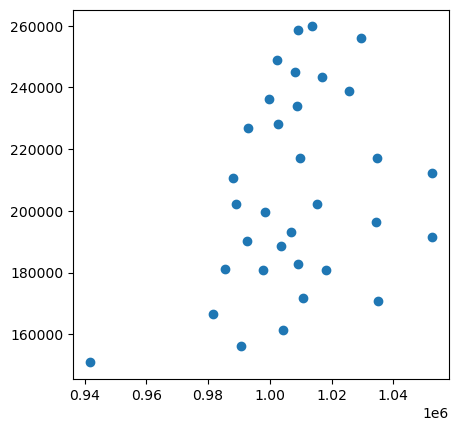

In [41]:
gdf.plot()

### `sample_points()`

In [42]:
sampled_points = gdf.sample_points(10)

/Users/szymonos/miniconda3/envs/dds/lib/python3.10/site-packages/pandas/core/series.py:4924: UserWarning: Sampling is not supported for Point geometry type.
  ).apply()


In [44]:
sampled_points[:3]

0    MULTIPOINT EMPTY
1    MULTIPOINT EMPTY
2    MULTIPOINT EMPTY
Name: sampled_points, dtype: geometry

In [45]:
# Nie chcemy zmieniac kolumny geometrii
sampled_points = gdf['geometry'].sample_points(10)

In [46]:
sampled_points[:3]

0    MULTIPOINT (987639.976 204672.792, 987653.985 ...
1    MULTIPOINT (1009924.516 259816.345, 1011455.74...
2    MULTIPOINT (1021940.657 252632.362, 1022210.06...
Name: sampled_points, dtype: geometry

<Axes: >

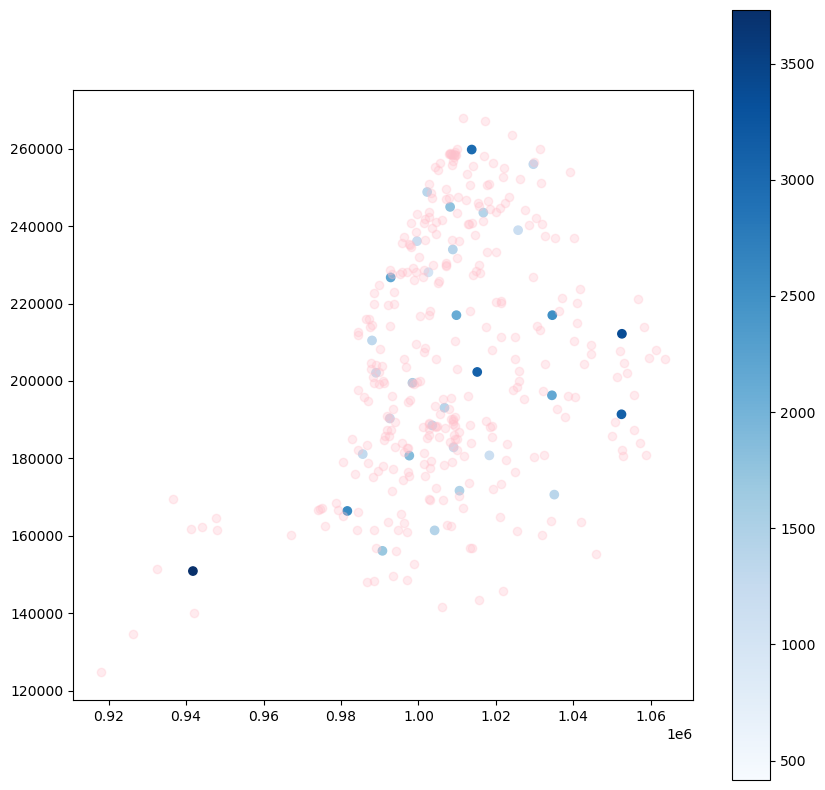

In [47]:
base = gdf.plot(figsize=FS, column='geometry_var', cmap='Blues', legend=True);
sampled_points.plot(ax=base, c='pink', alpha=0.3)

In [48]:
gdf.set_geometry('geometry', inplace=True)

<Axes: >

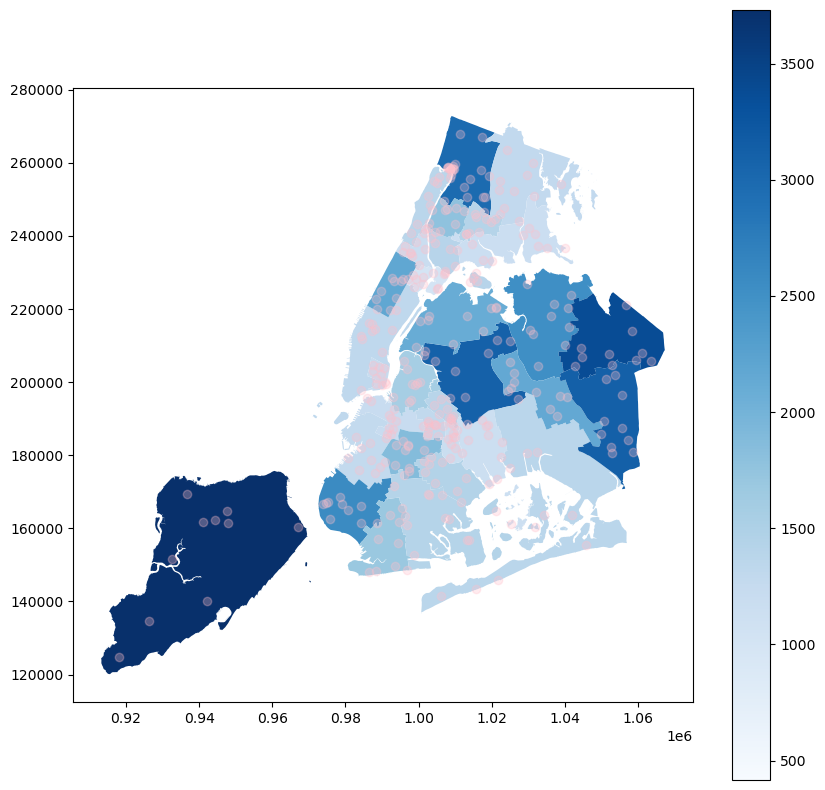

In [49]:
base = gdf.plot(figsize=FS, column='geometry_var', cmap='Blues', legend=True);
sampled_points.plot(ax=base, c='pink', alpha=0.3)

## Projekcja 

Najważniejszym parametrem danych przestrzennych jest rodzaj ich projekcji, w skrócie CRS albo Coordinate Reference System https://en.wikipedia.org/wiki/Spatial_reference_system

Wygodniej korzysta się z kodów EPSG (które są aliasami na CRS). Przykładowo 4326 - projekcja w trakerach GPS, 2180 - projekcja o najmniejszych zniekształceniach do mapowania obszaru Polski. Niektóre z projekcji są w metrach, inne w stopniach. Zobaczymy jak będzie deformować się metropolia Nowego Jorku po transformacjach CRS.

In [50]:
mercator_spherical = 'EPSG:3857'
gps = 'EPSG:4326'
north_america = '+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m no_defs'

In [51]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

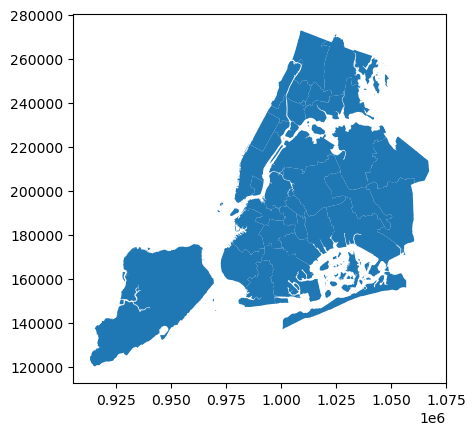

In [52]:
gdf.plot()

In [53]:
gdf1 = gdf.to_crs(mercator_spherical)

In [54]:
gdf1.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

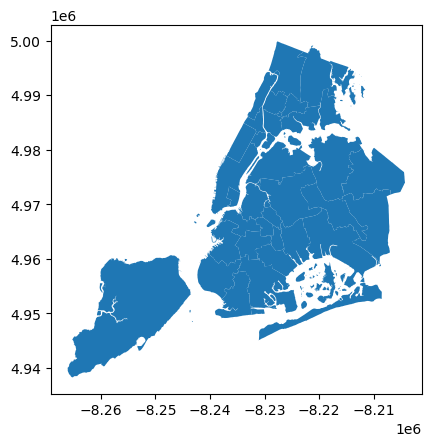

In [55]:
gdf1.plot()

In [56]:
gdf2 = gdf.to_crs(gps)
gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

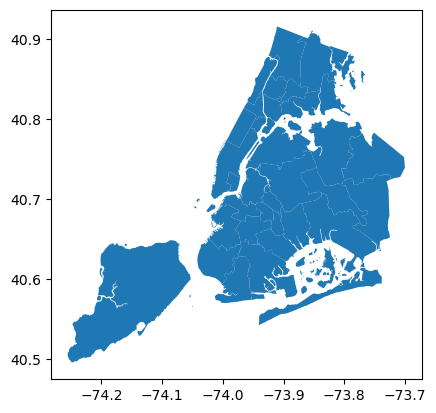

In [57]:
gdf2.plot()

In [58]:
gdf3 = gdf.to_crs(north_america)

<Axes: >

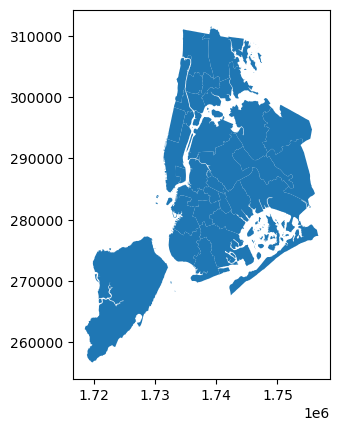

In [59]:
gdf3.plot()